In [192]:
from rayleigh_diagnostics import Shell_Avgs
import matplotlib.pyplot as plt
import numpy

In [211]:
sa = Shell_Avgs('00000005')
sa = Shell_Avgs('00000100')

In [212]:
tind = sa.lut[501]
dtdr = sa.lut[507]
d2t  = sa.lut[537]
niter = sa.niter
radius = sa.radius

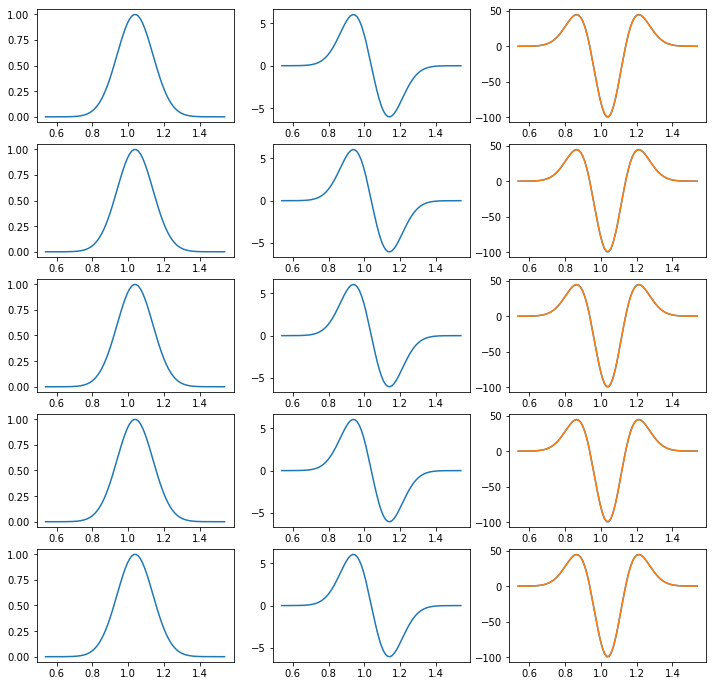

In [214]:
i = 0
fig, ax = plt.subplots(ncols=3,nrows=niter,figsize = (12,12))
for i in range(niter):
    ax[i][0].plot(radius,sa.vals[:,0,tind,i])
    ax[i][1].plot(radius,sa.vals[:,0,dtdr,i])
    ax[i][2].plot(radius,sa.vals[:,0,d2t,i])
    tmp = numpy.gradient(sa.vals[:,0,dtdr,i],radius)
    ax[i][2].plot(radius,tmp)

plt.show()

In [196]:
print(sa.vals[[0,1,126,127],0,tind,4] )

[3.13188133e-17 5.80550461e-08 5.82219619e-08 3.13188133e-17]


In [197]:
diff = sa.vals[:,0,tind,1]-sa.vals[:,0,tind,0]

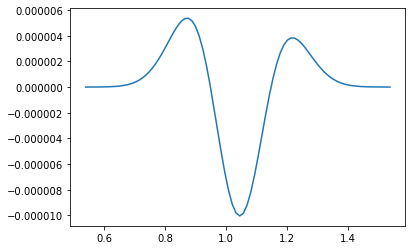

In [198]:
plt.figure(1)
plt.plot(radius,diff)
plt.show()

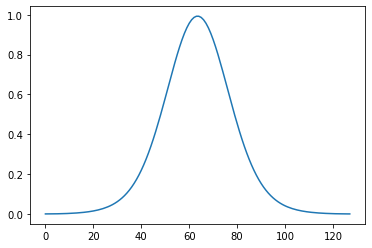

In [199]:
rmax = radius[0]
rmin = radius[sa.nr-1]
x = (radius-rmin)/(rmax-rmin)
x0 = 0.5
alpha=20.0
gauss = numpy.exp(- alpha*(x-x0)**2)
gauss = gauss-gauss[0]
plt.figure(1)
plt.plot(gauss)
plt.show()

In [200]:
print(gauss[[0,sa.nr-1]])

[0. 0.]


In [201]:
print(gauss)

[0.00000000e+00 4.06970613e-05 1.22730568e-04 2.47392879e-04
 4.16656791e-04 6.33217414e-04 9.00549306e-04 1.22297996e-03
 1.60578106e-03 2.05527910e-03 2.57898743e-03 3.18576175e-03
 3.88598152e-03 4.69175994e-03 5.61718490e-03 6.67859382e-03
 7.89488467e-03 9.28786539e-03 1.08826432e-02 1.27080542e-02
 1.47971334e-02 1.71876209e-02 1.99225012e-02 2.30505667e-02
 2.66269928e-02 3.07139096e-02 3.53809469e-02 4.07057246e-02
 4.67742522e-02 5.36811944e-02 6.15299507e-02 7.04324893e-02
 8.05088681e-02 9.18863700e-02 1.04698174e-01 1.19081490e-01
 1.35175074e-01 1.53116080e-01 1.73036179e-01 1.95056956e-01
 2.19284568e-01 2.45803748e-01 2.74671248e-01 3.05908891e-01
 3.39496464e-01 3.75364736e-01 4.13388947e-01 4.53383165e-01
 4.95095937e-01 5.38207655e-01 5.82330069e-01 6.27008296e-01
 6.71725615e-01 7.15911207e-01 7.58950858e-01 8.00200479e-01
 8.39002105e-01 8.74701870e-01 9.06669272e-01 9.34316930e-01
 9.57119919e-01 9.74633750e-01 9.86510072e-01 9.92509270e-01
 9.92509270e-01 9.865100

In [217]:
print(radius[0]-radius[1])

0.00030118130379586106


In [218]:
dr = radius[0]-radius[1]
print(dr**2)

9.071017775617474e-08


00006000 10
00003000 10
00008000 10
00002000 10
00004000 10
00005000 10
00009000 10
00007000 10
00001000 10
00010000 10


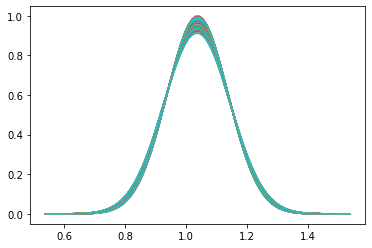

In [229]:
import os
files = os.listdir('Shell_Avgs')
nf = len(files)
plt.figure(1)
for i in range(nf):
    f = files[i]
    sa = Shell_Avgs(f)
    niter = sa.niter
    print(f,niter)
    for j in range(niter):
        plt.plot(sa.radius,sa.vals[:,0,tind,j])
plt.show()